In [1]:
#!pip install dython
#!pip install missingno
#!pip install dataframe_image
#!pip install pydotplus

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from dython import nominal
import missingno as msno
from pandas.plotting import table
import dataframe_image as dfi
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import pydotplus
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from IPython.display import Image
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pydotplus
from sklearn import tree
from IPython.display import Image
import itertools
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import os, errno
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import DBSCAN
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score

In [23]:
dfTest = pd.read_csv('C:/Users/Federico/Desktop/Data Science/Data Mining/Progetto/Classificazione/Test_HR_Employee_Attrition_New.csv') 

In [24]:
dfTrain = pd.read_csv('C:/Users/Federico/Desktop/Data Science/Data Mining/Progetto/Classificazione/Train_HR_Employee_Attrition_New.csv') 

In [25]:
print(len(X_train))
print(len(y_train))



1176
1176


In [26]:
label_encoders = dict()
column2encode = ["Attrition","BusinessTravel","EducationField","Gender","JobRole","MaritalStatus","OverTime"]

for col in column2encode:
    le = LabelEncoder()
    dfTrain[col] = le.fit_transform(dfTrain[col])
    dfTest[col] = le.fit_transform(dfTest[col])

    label_encoders[col] = le


In [27]:
#column2drop = ['Age', 'MonthlyIncome', 'TrainingTimesLastYear', 'PerformanceRating']
#dfTrain.drop(column2drop, axis=1, inplace=True)
#dfTest.drop(column2drop, axis=1, inplace=True)

In [28]:
attributes = [col for col in dfTrain.columns if col != 'Attrition']
X_train = dfTrain[attributes].values
y_train = dfTrain['Attrition']
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [29]:
attributes = [col for col in dfTest.columns if col != 'Attrition']
X_test = dfTest[attributes].values
y_test = dfTest['Attrition']

In [30]:
#frames = [dfTest, dfTrain]
#df = pd.concat(frames)
#attributes = [col for col in df.columns if col != 'Attrition']
#X = df[attributes].values
#y = df['Attrition']
    


In [31]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [32]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split' : range(5,25,5),
              'min_samples_leaf' : range(5,25,5),
              'max_depth': np.arange(2, 12)}


dt1 = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), 
                         param_grid, cv=StratifiedKFold(15), scoring='balanced_accuracy')

dt1_fit = dt1.fit(X_train, y_train)
report(dt1_fit.cv_results_, n_top=5)






Model with rank: 1
Mean validation score: 0.743 (std: 0.089)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.743 (std: 0.089)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.743 (std: 0.089)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 15}

Model with rank: 1
Mean validation score: 0.743 (std: 0.089)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 20}

Model with rank: 1
Mean validation score: 0.743 (std: 0.089)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.743 (std: 0.089)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 10}

Model with rank: 1
Mean validation s

In [33]:
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, min_samples_leaf=10,
                              class_weight="balanced")
clf1 = clf1.fit(X_train, y_train)

y_pred_tr = clf1.predict(X_train)

y_pred = clf1.predict(X_test)

print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print()

print('Val Accuracy %s' % accuracy_score(y_test, y_pred))
print('Val F1-score %s' % f1_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)


Train Accuracy 0.7993197278911565
Train F1-score [0.87270766 0.52610442]

Val Accuracy 0.8163265306122449
Val F1-score [0.8879668  0.49056604]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       249
           1       0.43      0.58      0.49        45

    accuracy                           0.82       294
   macro avg       0.67      0.72      0.69       294
weighted avg       0.84      0.82      0.83       294



array([[214,  35],
       [ 19,  26]], dtype=int64)

In [34]:
confusion_matrix(y_train, y_pred_tr)

array([[809, 175],
       [ 61, 131]], dtype=int64)

Age 0.0
BusinessTravel 0.0
DistanceFromHome 0.0
Education 0.0
EducationField 0.0
Gender 0.0
JobRole 0.0
MaritalStatus 0.0
MonthlyIncome 0.0
OverTime 0.3345614773715318
PercentSalaryHike 0.0
PerformanceRating 0.0
StockOptionLevel 0.11809490526420933
TotalWorkingYears 0.24887722864357495
TrainingTimesLastYear 0.0
YearsInCurrentRole 0.0
ChangeCompanyRate 0.0
Satisfaction 0.29846638872068393


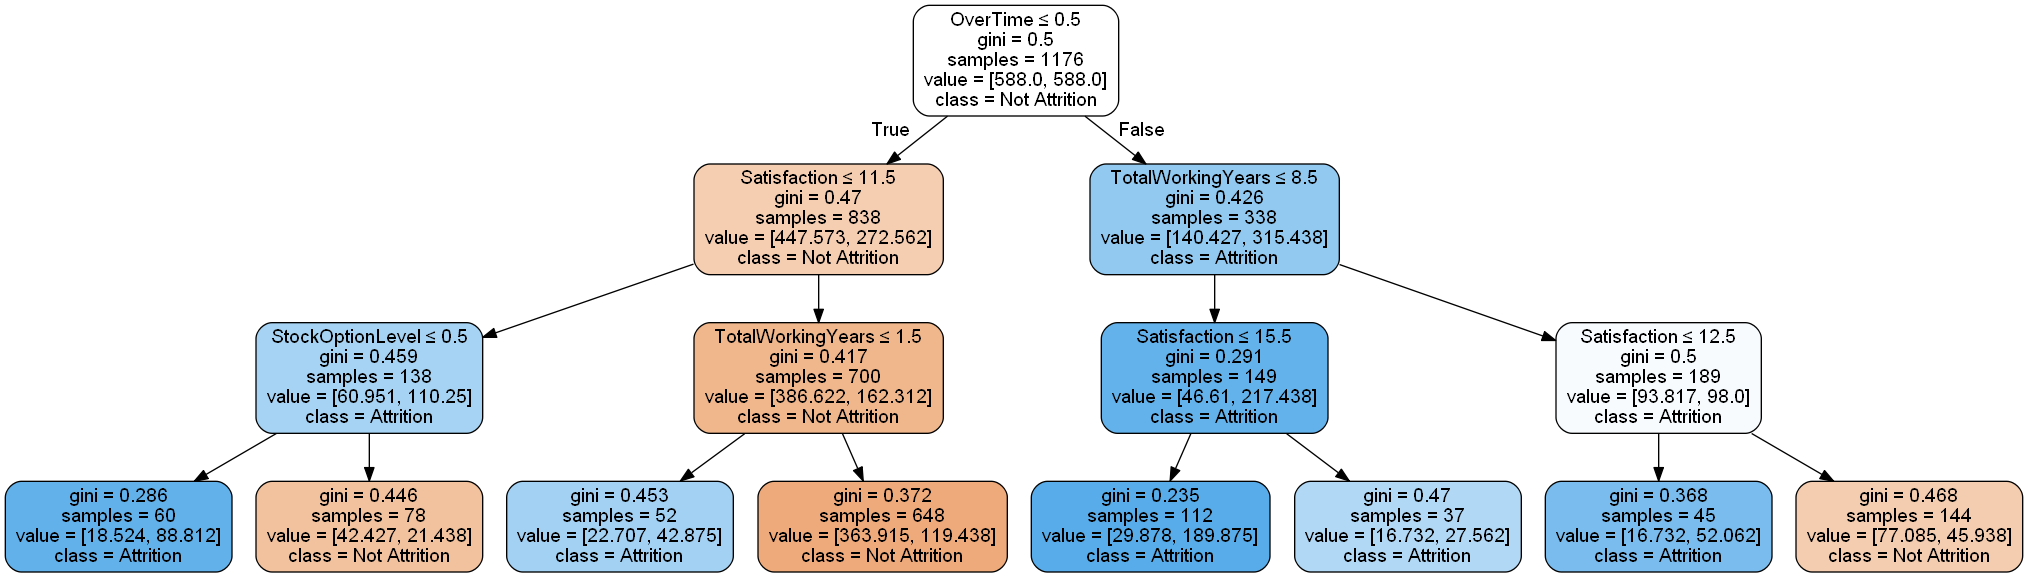

In [35]:
for col, imp in zip(attributes, clf1.feature_importances_):
    print(col, imp)
    
dot_data = tree.export_graphviz(clf1, out_file=None,
                                feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'Not Attrition' for x in clf1.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True
                               )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

0.7186077643908969


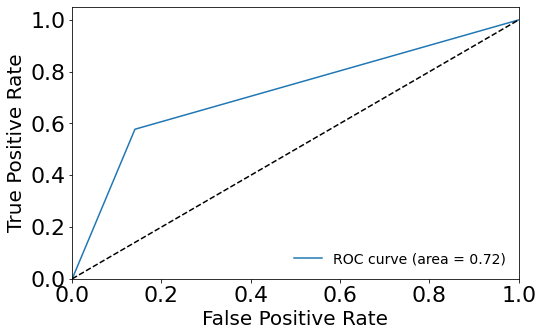

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [37]:
scores = cross_val_score(clf1, X_train, y_train, cv=StratifiedKFold(15),scoring='balanced_accuracy')
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf1, X_train, y_train, cv=StratifiedKFold(15), scoring='f1')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf1, X_train, y_train, cv=StratifiedKFold(15), scoring='roc_auc')
print('Roc_auc: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf1, X_train, y_train, cv=StratifiedKFold(15), scoring='recall')
print('Recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf1, X_train, y_train, cv=StratifiedKFold(15), scoring='precision')
print('Precision: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7428 (+/- 0.18)
F1-score: 0.5075 (+/- 0.23)
Roc_auc: 0.7603 (+/- 0.17)
Recall: 0.6735 (+/- 0.36)
Precision: 0.4140 (+/- 0.19)


In [144]:
import numpy as np

Model1=['gini',3,10,5]
Model2=['entropy',3,10,2]
Model3=['gini',5,7,5]
Model4=['gini',12,4,15]
Model5=['entropy',4,3,8]

models=np.array([Model1,Model2,Model3,Model4,Model5])
print(models)


[['gini' '3' '10' '5']
 ['entropy' '3' '10' '2']
 ['gini' '5' '7' '5']
 ['gini' '12' '4' '15']
 ['entropy' '4' '3' '8']]


In [145]:
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5}

In [146]:
Par = pd.DataFrame(models, columns = ['CRITERION', 'MAX_DEPTH','MIN_SAMPLES_SPLIT', 'MIN_SAMPLE_LEAF']) 

In [176]:
Par

,CRITERION,MAX_DEPTH,MIN_SAMPLES_SPLIT,MIN_SAMPLE_LEAF
0,gini,3,10,5
1,entropy,3,10,2
2,gini,5,7,5
3,gini,12,4,15
4,entropy,4,3,8


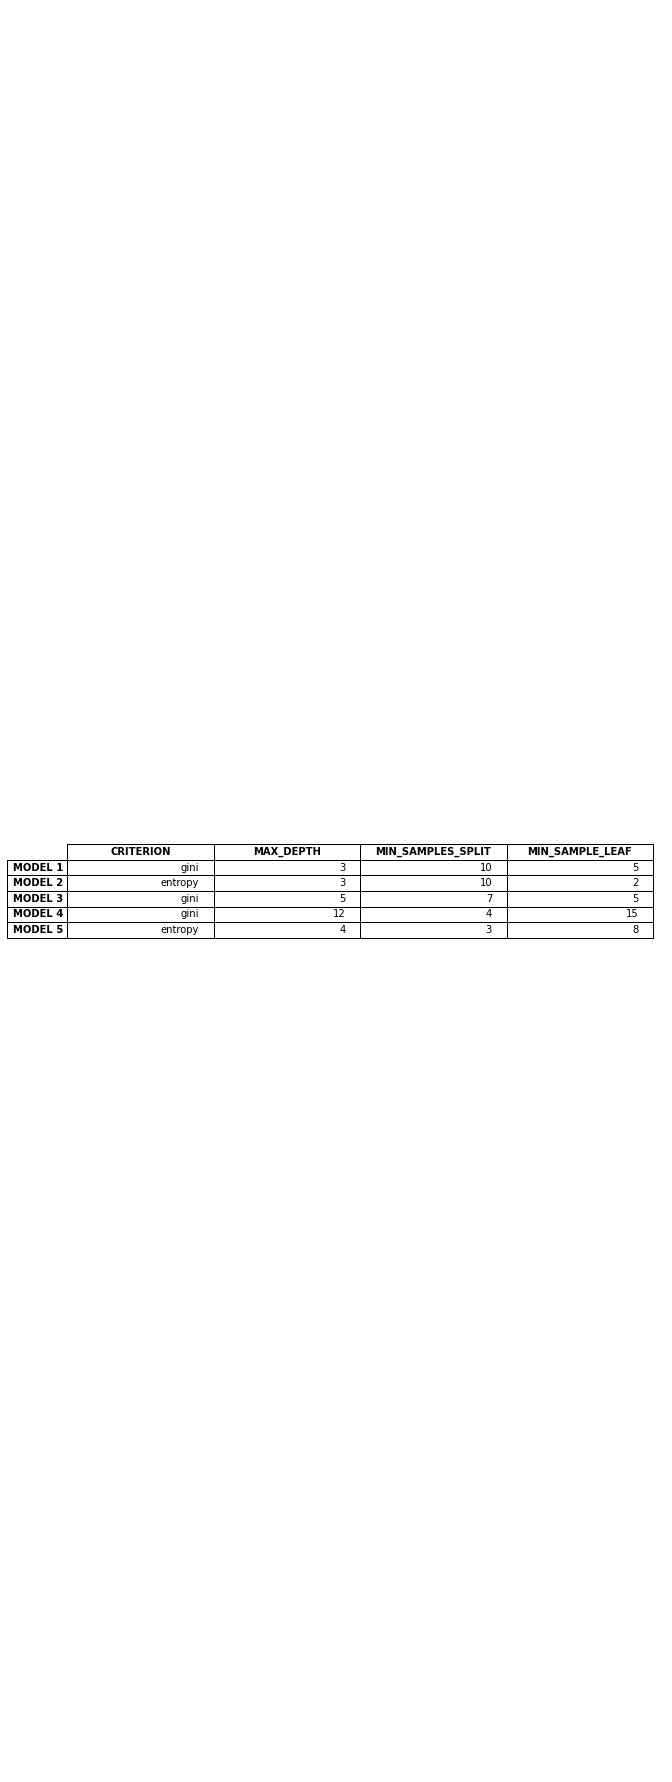

In [198]:
from matplotlib.font_manager import FontProperties



#fig, ax = plt.subplots()

fig=plt.figure(figsize=(10, 25))
ax = plt.gca()
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
row_labels=['MODEL 1','MODEL 2','MODEL 3','MODEL 4','MODEL 5']

aaa= plt.table(cellText=Par.values, rowLabels=row_labels,colLabels=Par.columns, 
         loc='center right')

       

for (row, col), cell in aaa.get_celld().items():
  if (row == 0) or (col == -1):
    cell.set_text_props(fontproperties=FontProperties(weight='bold'))
                        
fig.tight_layout()

plt.savefig('C:/Users/Federico/Desktop/missing.png' )

plt.show()


In [148]:
import numpy as np

Model1=[0.7428,0.5075,0.7603,0.6735,0.4140]
Model2=[0.7428,0.5075,0.0987,0.6735,0.7777]
Model3=[0.1234,0.1234,0.8765,0.6735,0.4140]
Model4=[0.7428,0.5555,0.7603,0.6666,0.4140]
Model5=[0.4890,0.4334,0.7776,0.6735,0.8888]

models=np.array([Model1,Model2,Model3,Model4,Model5])
print(models)


[[0.74 0.51 0.76 0.67 0.41]
 [0.74 0.51 0.1  0.67 0.78]
 [0.12 0.12 0.88 0.67 0.41]
 [0.74 0.56 0.76 0.67 0.41]
 [0.49 0.43 0.78 0.67 0.89]]


In [149]:
Table = pd.DataFrame(models, columns = ['ACCURACY', 'F1-SCORE','ROC_AUC', 'RECALL','PRECISION']) 

In [150]:
Table

,ACCURACY,F1-SCORE,ROC_AUC,RECALL,PRECISION
0,0.7428,0.5075,0.7603,0.6735,0.4140
1,0.7428,0.5075,0.0987,0.6735,0.7777
2,0.1234,0.1234,0.8765,0.6735,0.4140
3,0.7428,0.5555,0.7603,0.6666,0.4140
4,0.4890,0.4334,0.7776,0.6735,0.8888


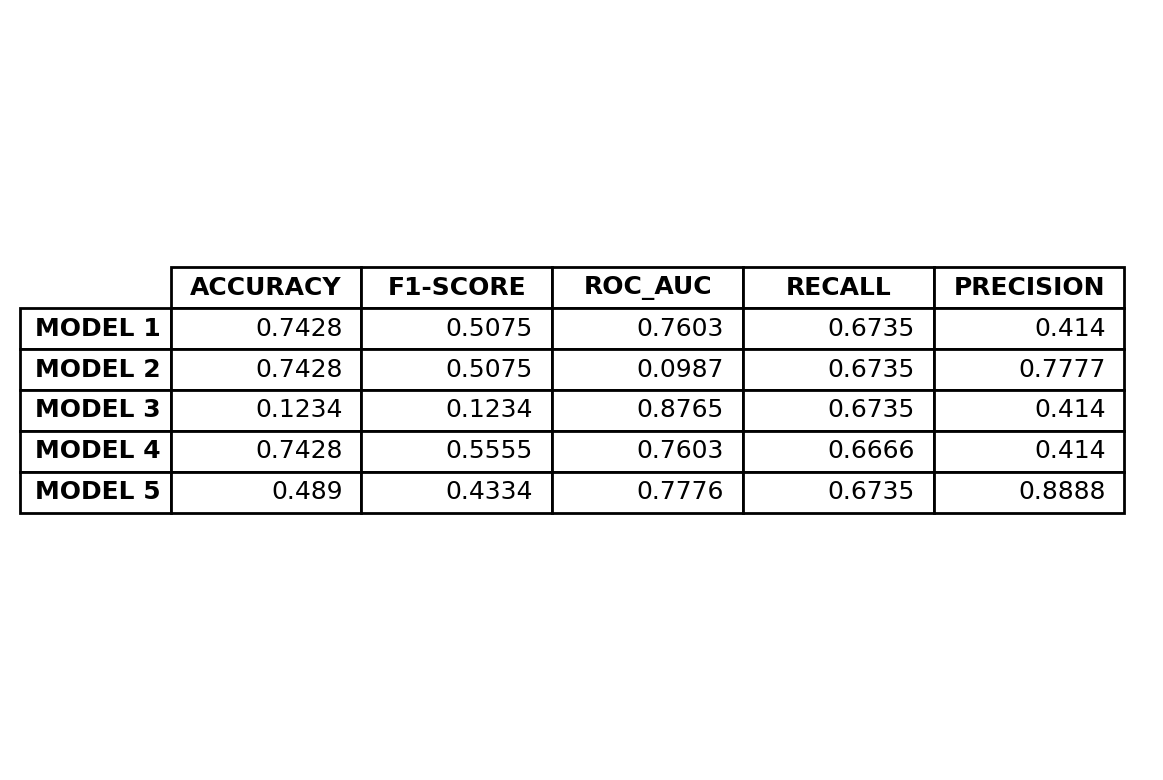

In [151]:
 
from matplotlib.font_manager import FontProperties



fig, ax = plt.subplots(dpi=200)

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
row_labels=['MODEL 1','MODEL 2','MODEL 3','MODEL 4','MODEL 5']

aaa= ax.table(cellText=Table.values, rowLabels=row_labels,colLabels=Table.columns, 
         loc='center right')

       

for (row, col), cell in aaa.get_celld().items():
  if (row == 0) or (col == -1):
    cell.set_text_props(fontproperties=FontProperties(weight='bold'))
                        
fig.tight_layout()
plt.show()


In [152]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 1.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[214  35]
 [ 19  26]]


<Figure size 2880x2160 with 0 Axes>

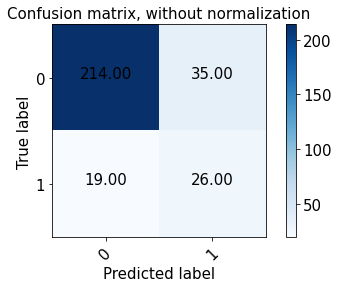

In [153]:
SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 15

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=15)  # fontsize of the figure title
plt.figure(figsize=(40, 30))

cm1=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm1, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')



plt.show()

Normalized confusion matrix
[[0.86 0.14]
 [0.42 0.58]]


<Figure size 2880x2160 with 0 Axes>

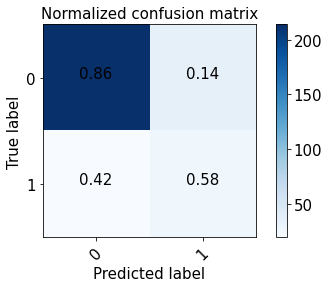

In [154]:
SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 15

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=15)  # fontsize of the figure title
plt.figure(figsize=(40, 30))
plt.figure()
plot_confusion_matrix(cm1, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')
